In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

import re

from sklearn.preprocessing import LabelEncoder

In [159]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

## Part 1 - K-Means and Hierarchical clustering

### Perform hierarchical and Kmeans clustering on FIFA 18 player performance data

In [160]:
attr = pd.read_csv('data/PlayerAttributeData.csv', dtype=str)
attr = attr.drop('Unnamed: 0', axis=1)
attr = attr.drop_duplicates()

In [161]:
def clean_name(name):
    return name.lower().replace(' ', '_')

In [162]:
attr.columns = list(map(clean_name, attr.columns))

In [163]:
attr.columns

Index(['acceleration', 'aggression', 'agility', 'balance', 'ball_control',
       'composure', 'crossing', 'curve', 'dribbling', 'finishing',
       'free_kick_accuracy', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes', 'heading_accuracy', 'id',
       'interceptions', 'jumping', 'long_passing', 'long_shots', 'marking',
       'penalties', 'positioning', 'reactions', 'short_passing', 'shot_power',
       'sliding_tackle', 'sprint_speed', 'stamina', 'standing_tackle',
       'strength', 'vision', 'volleys'],
      dtype='object')

In [164]:
attr.id.describe()

count      17929
unique     17929
top       221656
freq           1
Name: id, dtype: object

In [165]:
def strip_rank(val):
    return re.search('([0-9]+)', val).group(0)

In [166]:
for col in attr.columns:
    attr[col] = attr[col].apply(strip_rank).astype(int)

In [167]:
def plot_hist(col: pd.Series, bins=None, title='Histogram', xlabel='Value'):
    name = ' - ' + col.name
    bins = int(len(col)/100) if bins is None else bins
    y,x,_ = plt.hist(col, bins=bins)
    plt.vlines(np.mean(col), min(y), max(y), label='Mean - {:.3f}'.format(np.mean(col)))
    plt.title(title + name)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.legend()
    None

In [168]:
# plot_hist(attr.acceleration, 20)

In [122]:
# plot_hist(attr.aggression, 20)

In [124]:
# plot_hist(attr.positioning, 20)

In [125]:
# plot_hist(attr.gk_kicking, 10)

In [15]:
attr_corr = attr.drop('id', axis=1).corr()

In [16]:
def plot_correlation_matrix(df):
    fig, ax = plt.subplots(figsize=(16,12))
    mat = ax.matshow(df.corr(), cmap=plt.cm.RdBu)

    fig.colorbar(mat)

    ticks = range(len(df.columns))
    ax.set_xticks(ticks)
    ax.set_xticklabels(df.columns, 
                       rotation=50, 
                       horizontalalignment = 'left', 
                       verticalalignment='bottom')

    ax.set_yticks(ticks)
    ax.set_yticklabels(df.columns, 
                       rotation=0, 
                       horizontalalignment = 'right', 
                       verticalalignment='bottom')
    None

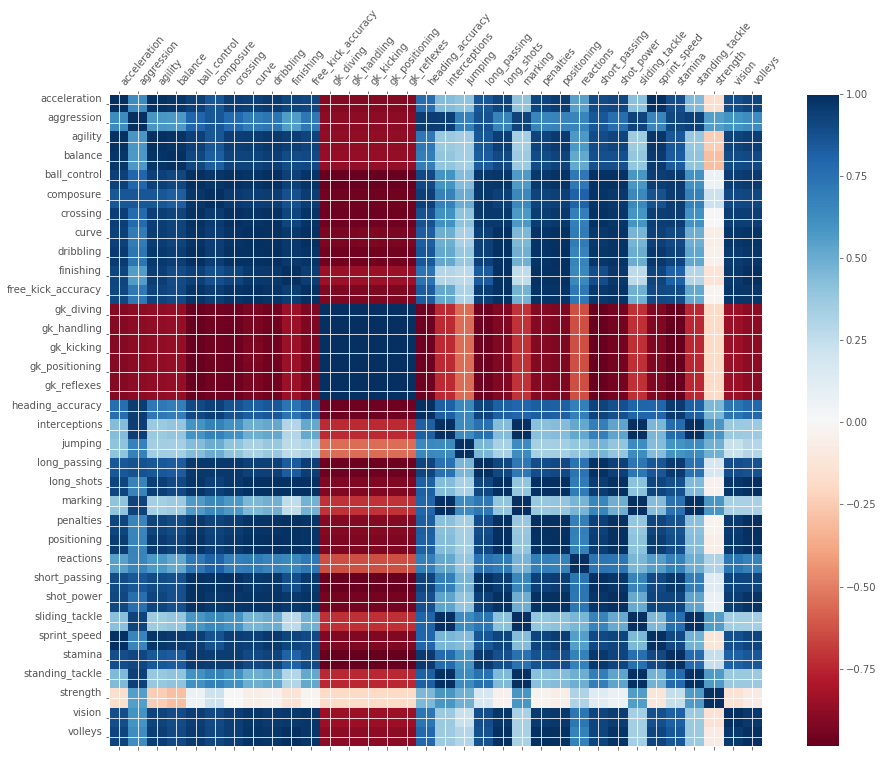

In [17]:
plot_correlation_matrix(attr_corr)

In [18]:
clustergrid = sns.clustermap(attr.drop('id', axis=1), metric='correlation', figsize=(16,12))
None

#### K-means clustering

In [20]:
def generate_clusters(data, k):
    if len(data.shape) == 1:
        return
    else:
        features = data.shape[1]
    
    avg = np.mean(data)
    std = np.std(data)

    centers = np.random.randn(k, features) * (std) + avg
    return (data, centers)

In [21]:
# data, clusters = generate_clusters(attr[['gk_diving', 'gk_handling', 'ball_control']].values, 5)

In [22]:
def plot_clusters(data, centers, labels=None):
    cmap = plt.cm.get_cmap('jet')
    n = len(centers)
    color_ix = [i/n for i in range(1,n+1)]
    colors = [cmap(c) for c in color_ix]

    for row in data:
        plt.scatter(row[0], row[1], color=colors[np.random.choice(len(colors))])
        
    for i, center in enumerate(centers):
        plt.scatter(center[0],center[1], marker='*', s=250, label=i, color=colors[i])
    
    plt.legend()

---

In [23]:
from sklearn.cluster import KMeans

In [24]:
km5 = KMeans(5)

In [25]:
km5.fit(attr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Use both visuals and statistical methods (elbow) to identify a cluster multiplicity

In [26]:
def kmeans_elbow(data_, n_clusters):
    
    elbows_ = list()
    cluster_vals = range(1,n_clusters+1)
    for i in cluster_vals:
        elbows_.append(KMeans(i).fit(data_).inertia_)
        
    print(elbows_)
#     plt.plot(cluster_vals, None)
    return elbows_

In [27]:
el = kmeans_elbow(attr,5)

[18744628718169.98, 7942114410602.555, 3828546387288.091, 1781705669200.7534, 1067059375285.1824]


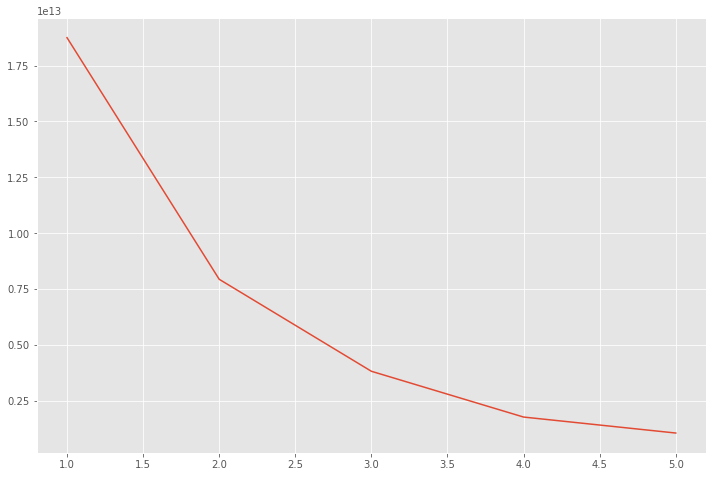

In [28]:
fig, ax = plt.subplots()
ax.plot(range(1,len(el)+1), el)
None

In [29]:
def plot_3D(data_3D, labels=None, **kwargs):
    fig_ = plt.figure(figsize=(10,8))
    ax = Axes3D(fig_)
    ax.scatter(data_3D.iloc[:, 0], data_3D.iloc[:, 1], data_3D.iloc[:, 2], c=labels, **kwargs) 
    return ax

In [191]:
def plot_clusters_3D(data_, centers_, labels=None):
#     ax = plot_3D(data_, labels)
#     ax.scatter(centers_.loc[0], centers_.loc[1], centers_.loc[2], c=labels)
    fig = plt.figure(figsize=(10,10))
    ax3d = Axes3D(fig)
    ax3d.scatter(data_.iloc[:, 0], data_.iloc[:, 1], data_.iloc[:, 2], c = labels, alpha=0.2)
    ax3d.scatter(centers_.loc[0], centers_.loc[0], centers_.loc[0], marker = "*", c = 'red', s=300, alpha=1)
    ax3d.set_xlabel(cols[0])
    ax3d.set_ylabel(cols[1])
    ax3d.set_zlabel(cols[2])

In [31]:
def kmeans_clusters_3D(data_, n_clusters):
    
    km_ = KMeans(n_clusters)
    km_.fit(data_)

    plot_3D(data_, km_.labels_.astype(float))
    
    return

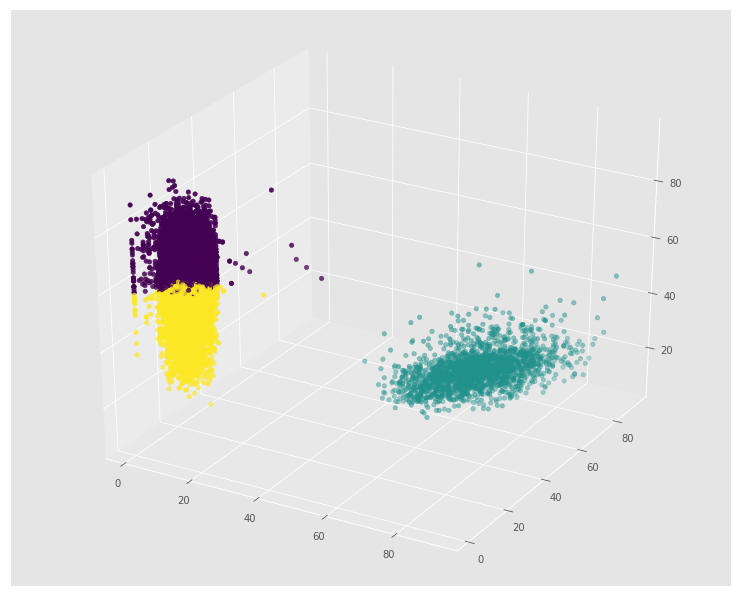

In [32]:
kmeans_clusters_3D(attr[['gk_diving', 'gk_handling', 'ball_control']], 3)

In [33]:
kmeans_clusters_3D(attr[['gk_diving', 'gk_handling', 'ball_control']], 7)

In [34]:
km3 = KMeans(3)

In [35]:
km3.fit(attr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
km3_df = pd.DataFrame(km3.cluster_centers_, columns = attr.columns)

In [176]:
attr_km3 = attr.assign(km_cluster = km3.labels_)

In [192]:
cols = ['sliding_tackle', 'long_shots', 'dribbling']
col_centers = km3_df[cols]
km_data = attr_km3[cols]

plot_clusters_3D(km_data, col_centers, labels=km3.labels_)
# fig = plt.figure(figsize=(12,12))
# ax3d = Axes3D(fig)
# ax3d.scatter(km_data.iloc[:, 0], km_data.iloc[:, 1], km_data.iloc[:, 2], c = km3.labels_, alpha=0.2)
# ax3d.scatter(col_centers.loc[0],col_centers.loc[0],col_centers.loc[0], marker = "*", c = 'red', s=300, alpha=1)
# ax3d.set_xlabel(cols[0])
# ax3d.set_ylabel(cols[1])
# ax3d.set_zlabel(cols[2])
# None

<IPython.core.display.Javascript object>

### Create a dendrogram tree using hierarchical clustering. At different heights, cut the tree and compute any overlap(s) with the KMeans clusters. 
### Would any overlap occur just by chance? Is there any significance in the overlap(s)? (How can we do it? Statistics?)

In [39]:
from scipy.cluster import hierarchy

In [40]:
Z = hierarchy.linkage(attr[::5], 'ward')

In [41]:
fig, ax = plt.subplots(figsize=(12,12))
hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=attr[::5].index)
None

In [169]:
from sklearn.cluster import AgglomerativeClustering

In [174]:
agg = AgglomerativeClustering(5, linkage='ward')

In [175]:
agg.fit(attr.drop('id', axis=1))

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func=<function mean at 0x000000776E1892F0>)

In [178]:
attr_cluster = attr_km3.assign(agg_cluster = agg.labels_)

### User the player personal data to assign a label to each cluster (ex cluster x - average age is young, nationality is Spanish, wages are high)

In [42]:
pers = pd.read_csv('data/PlayerPersonalData.csv')
pers = pers.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
pers = pers.drop_duplicates()

In [43]:
pers.columns = list(map(clean_name, pers.columns))

In [44]:
pers.columns

Index(['id', 'name', 'age', 'photo', 'nationality', 'flag', 'overall',
       'potential', 'club', 'club_logo', 'value', 'wage', 'special'],
      dtype='object')

In [45]:
pers.club = pers.club.replace(np.nan, 'Unknown')

In [179]:
joint = pers.merge(attr_cluster, on='id')

<IPython.core.display.Javascript object>


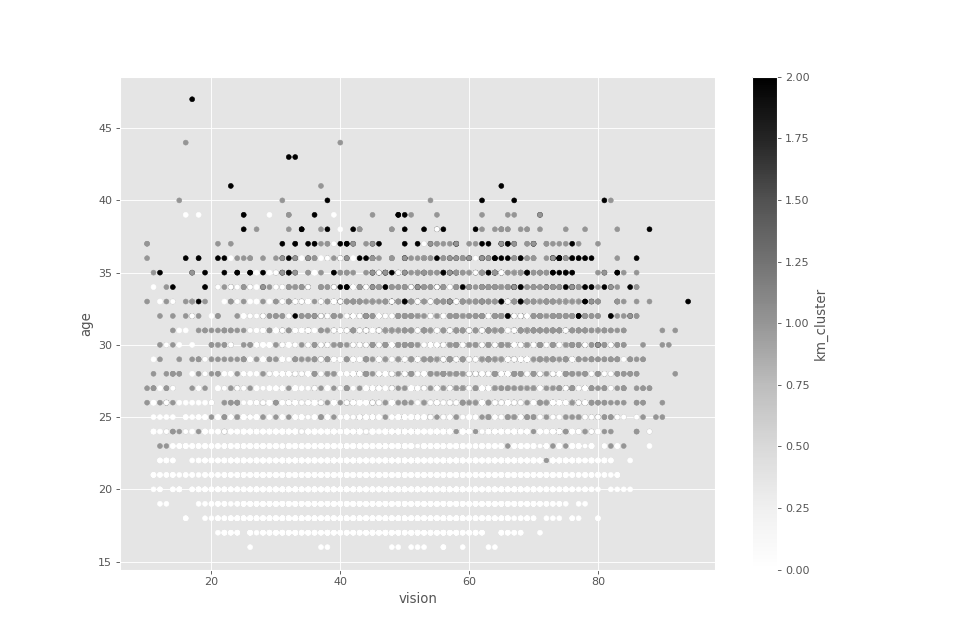

In [186]:
joint.plot.scatter('vision', 'age', c='km_cluster')

<IPython.core.display.Javascript object>


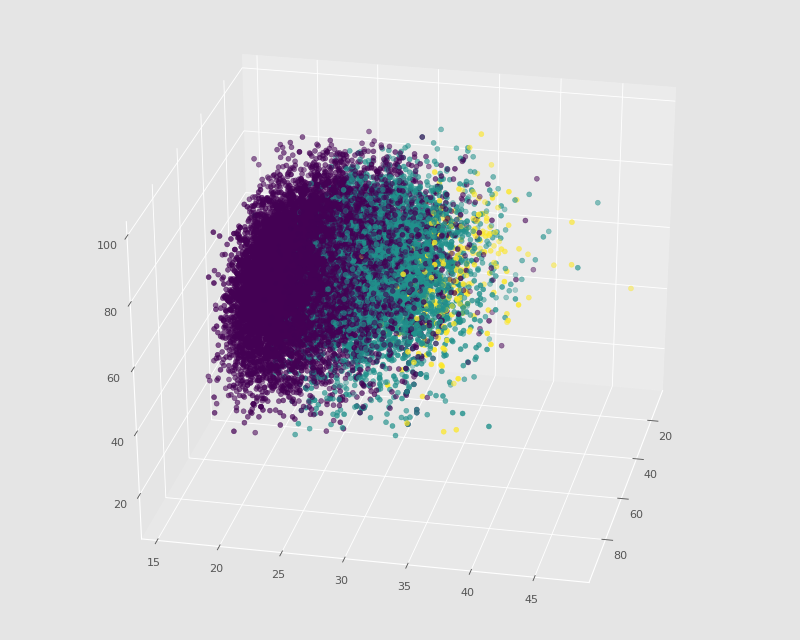

In [194]:
cols = ['vision', 'age', 'strength']
plot_3D(joint[cols], labels=joint.km_cluster)

In [181]:
# joint.loc[clustergrid.dendrogram_row.reordered_ind].shape

In [180]:
# joint.loc[clustergrid.dendrogram_col.reordered_ind].shape

---

In [48]:
# joint = pd.concat([attr, pers], axis=1)

In [49]:
# multi_filter = joint.groupby('id').count().sort_values(by='name', ascending=False).name

In [50]:
# joint[joint.id.isin((joint.groupby('id').count().sort_values(by='name', ascending=False).name == 4).index.values)]

---

## Part 2: PCA

### Perform PCA on player attribute data. Analyze and interpret the results.

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(3)
pca_attr = pca.fit(attr.drop('id', axis=1))
pca_attr = pd.DataFrame(pca.fit_transform(attr))

In [53]:
pca_attr = pca_attr.assign(id = attr.id)

In [54]:
kmeans_clusters_3D(pca_attr.drop('id', axis=1), 3)

In [55]:
Z_pca = hierarchy.linkage(pca_attr.drop('id', axis=1), 'ward')

In [56]:
# fig, ax = plt.subplots(figsize=(16,16))
# hierarchy.dendrogram(Z_pca, leaf_rotation=90, leaf_font_size=8, labels=pca_attr.index)
# None

In [57]:
# hierarchy.dendrogram(Z_pca, p=10, leaf_rotation=90, leaf_font_size=8, labels=pca_attr.index)
# None

### How many principal components represent 80% variance in date?

In [58]:
pca.explained_variance_ratio_[0]

0.9999907317079754

### Can we use PCA to cluster players? If so, compare the results to exercise in part 1.

---

## Part 3: Bonus - Feature importance in clustering (class discussion)
### Can we think of a way to identify features relevant for clustering (Hint: statistics or permutations)?
## Part 4: Bonus+ - PCA vs T-SNE
### Use the link provided on t-SNE slide to learn and compare results of PCA and t-sne on high dimensional data. Explain the results to whole class.